### Import Libraries


In [1]:
import pandas as pd
import datetime
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

### Preprocessing & Descriptive Analytics

Data over het coronavirus (COVID-19)
https://data.europa.eu/euodp/nl/data/dataset/covid-19-coronavirus-data

In [2]:
url = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'
df=pd.read_csv(url)
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,24/07/2020,24,7,2020,13,0,Afghanistan,AF,AFG,38041757.0,Asia,5.309955
1,23/07/2020,23,7,2020,188,21,Afghanistan,AF,AFG,38041757.0,Asia,5.946098
2,22/07/2020,22,7,2020,112,4,Afghanistan,AF,AFG,38041757.0,Asia,5.606997
3,21/07/2020,21,7,2020,140,5,Afghanistan,AF,AFG,38041757.0,Asia,5.864608
4,20/07/2020,20,7,2020,174,17,Afghanistan,AF,AFG,38041757.0,Asia,6.634814


In [3]:
df.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,31805.000000,31805.000000,31805.000000,31805.000000,31805.000000,3.174100e+04,29024.000000
mean,15.711649,4.648357,2019.997893,486.636441,19.906367,4.518841e+07,24.492605
std,8.638585,1.754517,0.045850,2992.093502,122.240309,1.635398e+08,64.002659
min,1.000000,1.000000,2019.000000,-29726.000000,-1918.000000,8.150000e+02,-32.757608
25%,8.000000,4.000000,2020.000000,0.000000,0.000000,1.641164e+06,0.139645
50%,16.000000,5.000000,2020.000000,5.000000,0.000000,8.544527e+06,2.878063
75%,23.000000,6.000000,2020.000000,91.000000,2.000000,3.041786e+07,16.932132
max,31.000000,12.000000,2020.000000,76930.000000,4928.000000,1.433784e+09,885.924117


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31805 entries, 0 to 31804
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     31805 non-null  object 
 1   day                                                         31805 non-null  int64  
 2   month                                                       31805 non-null  int64  
 3   year                                                        31805 non-null  int64  
 4   cases                                                       31805 non-null  int64  
 5   deaths                                                      31805 non-null  int64  
 6   countriesAndTerritories                                     31805 non-null  object 
 7   geoId                                                       31673 non-null  object 
 

In [5]:
df['dateRep'] = pd.to_datetime(df['dateRep'],dayfirst=True)
df.rename(columns={'dateRep':'date'},inplace=True)
df['dayofweek'] = df['date'].apply(lambda time: time.dayofweek)
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if x > 4 else 0)

In [6]:
df.head()

,date,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,dayofweek,weekend
0,2020-07-24,24,7,2020,13,0,Afghanistan,AF,AFG,38041757.0,Asia,5.309955,4,0
1,2020-07-23,23,7,2020,188,21,Afghanistan,AF,AFG,38041757.0,Asia,5.946098,3,0
2,2020-07-22,22,7,2020,112,4,Afghanistan,AF,AFG,38041757.0,Asia,5.606997,2,0
3,2020-07-21,21,7,2020,140,5,Afghanistan,AF,AFG,38041757.0,Asia,5.864608,1,0
4,2020-07-20,20,7,2020,174,17,Afghanistan,AF,AFG,38041757.0,Asia,6.634814,0,0


In [7]:
cases = df.groupby(df['date']).sum()['cases']
deaths= df.groupby(df['date']).sum()['deaths']
casesinnl = df[df['geoId']=='NL'].groupby(df['date']).sum()['cases']
deathsinnl = df[df['geoId']=='NL'].groupby(df['date']).sum()['deaths']
casesbycountries = df.groupby(df['countriesAndTerritories']).sum()['cases'].sort_values(ascending = False).head(20)
deathsbycountries = df.groupby(df['countriesAndTerritories']).sum()['deaths'].sort_values(ascending = False).head(20)
weekends = df.groupby(df["weekend"]).sum()['cases']
weekendsNL = df[df['geoId']=='NL'].groupby(df["weekend"]).sum()['cases']


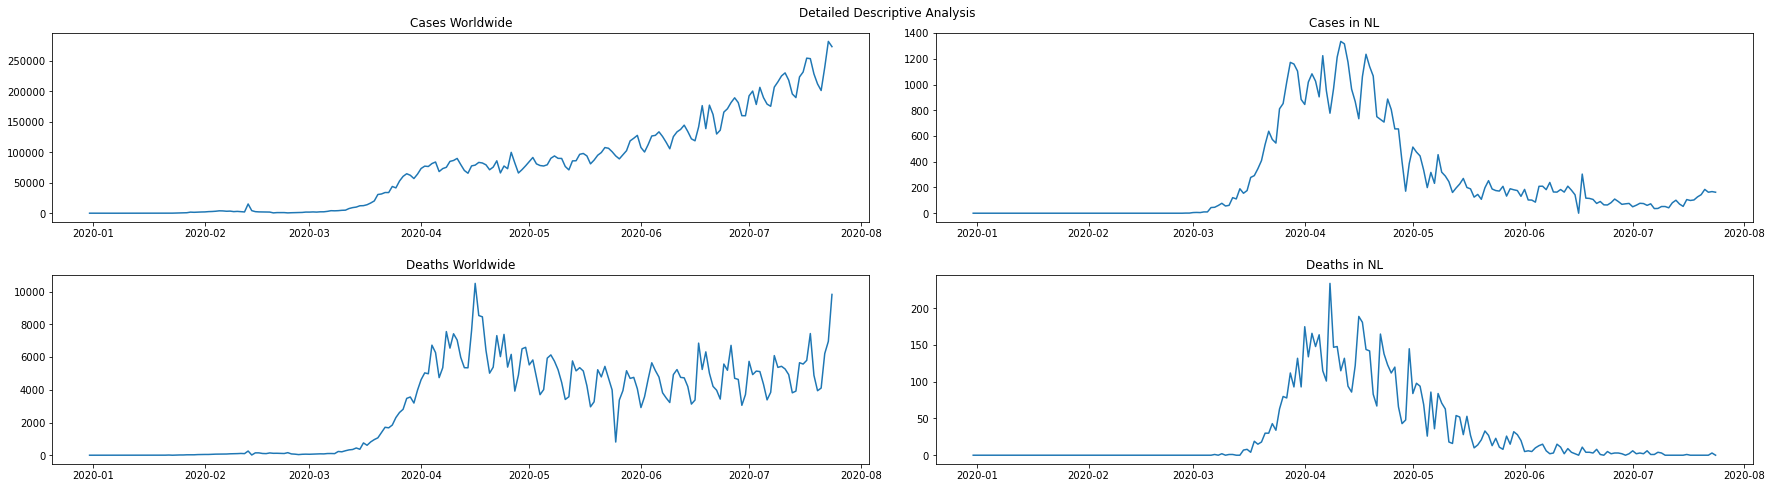

In [8]:
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2,2, figsize=(25,7))
fig.suptitle('Detailed Descriptive Analysis')
ax1.set_title('Cases Worldwide')
ax1.plot(cases)
ax2.set_title('Cases in NL')
ax2.plot(casesinnl)
ax3.set_title('Deaths Worldwide')
ax3.plot(deaths)
ax4.set_title('Deaths in NL')
ax4.plot(deathsinnl)
fig.tight_layout(pad=2.0)

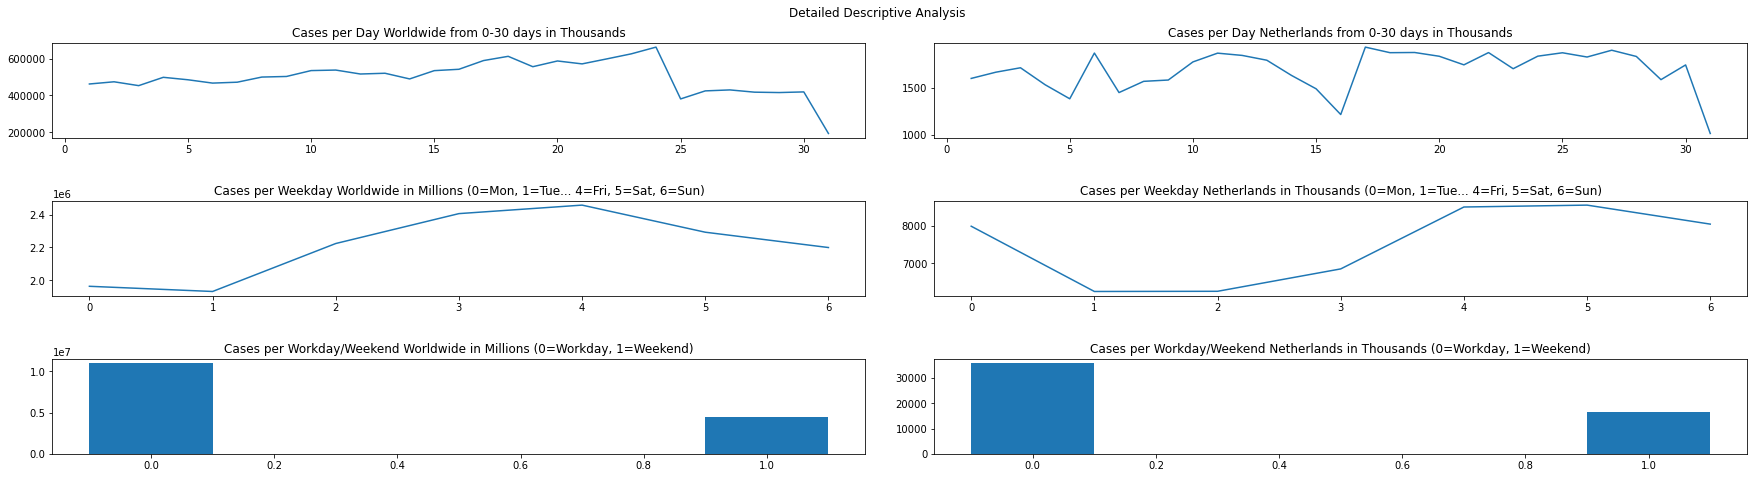

In [9]:
fig, ((ax1, ax2), (ax3,ax4),(ax5,ax6)) = plt.subplots(3,2, figsize=(25,7))
fig.suptitle('Detailed Descriptive Analysis')
ax1.set_title('Cases per Day Worldwide from 0-30 days in Thousands')
ax1.plot(df.groupby(df["date"].dt.day).sum()['cases'])
ax2.set_title('Cases per Day Netherlands from 0-30 days in Thousands')
ax2.plot(df[df['geoId']=='NL'].groupby(df["date"].dt.day).sum()['cases'])
ax3.set_title('Cases per Weekday Worldwide in Millions (0=Mon, 1=Tue... 4=Fri, 5=Sat, 6=Sun)')
ax3.plot(df.groupby(df["dayofweek"]).sum()['cases'])
ax4.set_title('Cases per Weekday Netherlands in Thousands (0=Mon, 1=Tue... 4=Fri, 5=Sat, 6=Sun)')
ax4.plot(df[df['geoId']=='NL'].groupby(df["dayofweek"]).sum()['cases'])
ax5.set_title('Cases per Workday/Weekend Worldwide in Millions (0=Workday, 1=Weekend)')
ax5.bar(weekends.index, weekends.values,width=0.2)
ax6.set_title('Cases per Workday/Weekend Netherlands in Thousands (0=Workday, 1=Weekend)')
ax6.bar(weekendsNL.index,weekendsNL.values, width=0.2)
fig.tight_layout(pad=3.0)

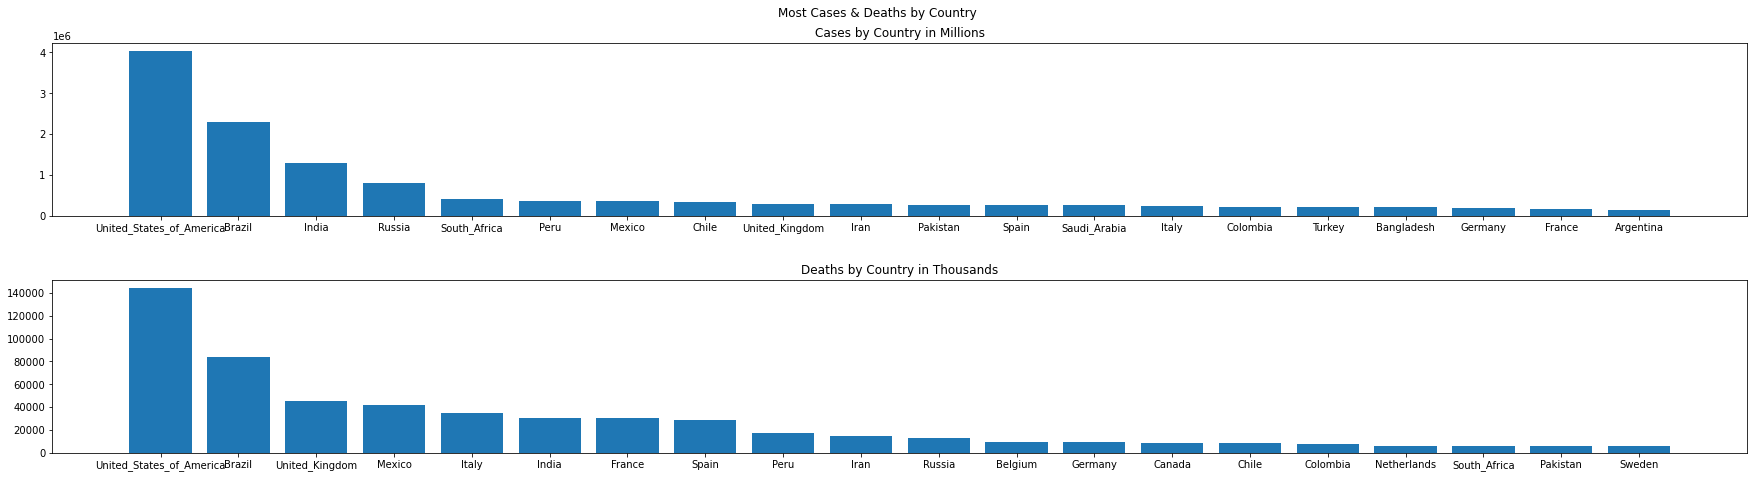

In [10]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(25,7))
fig.suptitle('Most Cases & Deaths by Country')
ax1.set_title('Cases by Country in Millions')
ax1.bar(casesbycountries.index,casesbycountries.values)
ax2.set_title('Deaths by Country in Thousands')
ax2.bar(deathsbycountries.index,deathsbycountries.values)
fig.tight_layout(pad=3.0)

### Train/Test Dataset

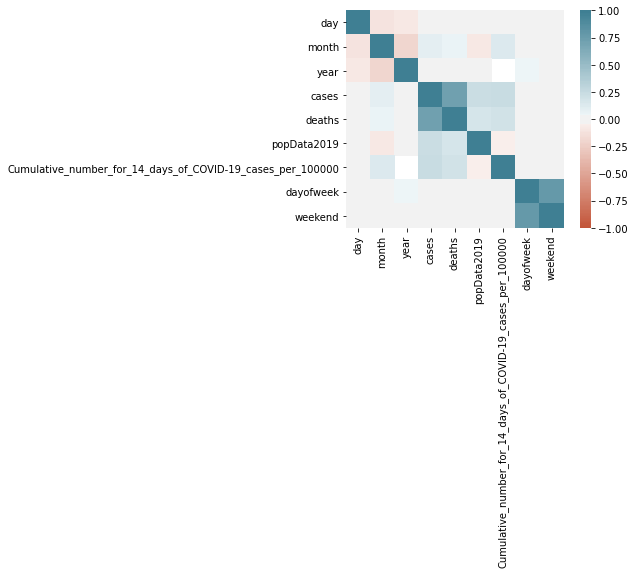

In [11]:
#fig = plt.subplots(figsize=(10,8))
corr = df.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1,center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)


In [12]:
import pandas as pd
import datetime
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import numpy
from sklearn import linear_model
import statsmodels.api as sm 


#### Polynomial  Regression


In [13]:
url = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'
df=pd.read_csv(url)
df['dateRep'] = pd.to_datetime(df['dateRep'],dayfirst=True)
df.rename(columns={'dateRep':'date'},inplace=True)
df.head()

,date,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-07-24,24,7,2020,13,0,Afghanistan,AF,AFG,38041757.0,Asia,5.309955
1,2020-07-23,23,7,2020,188,21,Afghanistan,AF,AFG,38041757.0,Asia,5.946098
2,2020-07-22,22,7,2020,112,4,Afghanistan,AF,AFG,38041757.0,Asia,5.606997
3,2020-07-21,21,7,2020,140,5,Afghanistan,AF,AFG,38041757.0,Asia,5.864608
4,2020-07-20,20,7,2020,174,17,Afghanistan,AF,AFG,38041757.0,Asia,6.634814


Variance score R2: 0.95
Adjusted R2: 0.95
Residual sum of squares (SSE): 7351.20


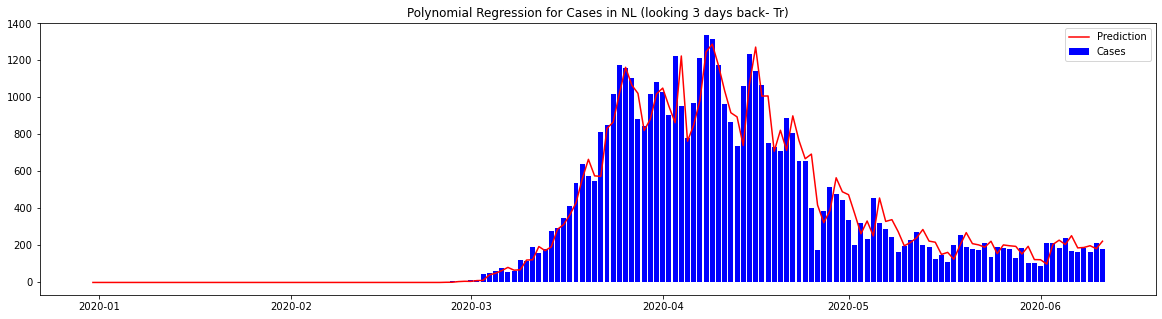

In [47]:
df1 = df.copy()
df1 = df1[df1['date']<= '2020-07-23']
data=df1[df1['geoId']=='NL']
data=data[::-1]
data = data.reset_index(drop=True)
df2 = pd.DataFrame(data.cases,)


n_samples = 3
n_vars = 1
n_output = 1
records, column_names = list(),list()

for i in range(n_samples,0,-1):
    records.append(df2.shift(i))
    column_names += [('var%d(t-%d)' % (j+1,i)) for j in range(n_vars)]
agg=pd.concat(records,axis=1)
agg.columns = column_names
agg['output'] = df2['cases']

ratio = 0.8
n_train = int(agg.shape[0]*ratio)
x=agg.iloc[n_samples:,0:n_samples]
y=agg.iloc[n_samples:,-1]

xtrain = x[:n_train]
ytrain = y[:n_train]
xtest = x[n_train:]
ytest = y[n_train:]

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree = 2) 
x_poly=poly.fit_transform(xtrain)
#n_poly=len(x_poly)

poly.fit(x_poly,ytrain)
lin=linear_model.LinearRegression()
lin.fit(x_poly,ytrain)

yhattrain = lin.predict(poly.fit_transform(xtrain))
plt.figure(figsize=(20,5))
plt.bar(data['date'][:n_train],ytrain,color = 'blue')
#plt.plot(data['date'][:n_train],ytrain, linestyle='--', marker='o')
plt.plot(data['date'][:n_train],yhattrain,color = 'red')
plt.title(f'Polynomial Regression for Cases in NL (looking {n_samples} days back- Tr)')
plt.legend(['Prediction', 'Cases'])
# Explained variance score: 1 is perfect prediction
r2 = lin.score(poly.fit_transform(xtrain), ytrain)
n=xtrain.shape[0]
p=xtrain.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('Variance score R2: %.2f' % r2)
print('Adjusted R2: %.2f' % adjusted_r2) 
print("Residual sum of squares (SSE): %.2f" % np.mean((ytrain-yhattrain) ** 2))

![](Ar2.png) #R-squared is the coefficient of determination, is the proportion of the variance in the dependent variable that is predictable from the independent variable(s)

#Adjusted R2 adjusts the statistic based on the number of independent variables in the model.

#SSE A residual sum of squares (RSS) is a statistical technique used to measure the amount of variance in a data set that is not explained by a regression model

Variance score R2: -0.35
Adjusted R2: -0.46
Residual sum of squares: 3555.74


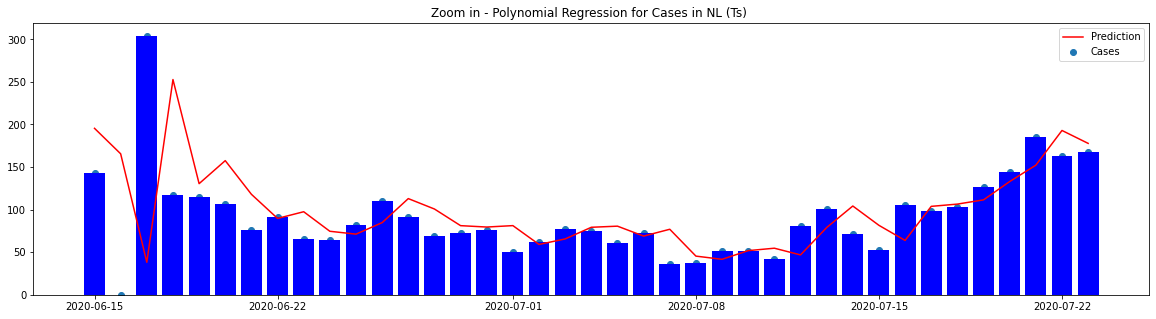

In [48]:
yhattest = lin.predict(poly.fit_transform(xtest))
plt.figure(figsize=(20,5))
plt.scatter(data['date'][n_train+n_samples:],ytest)
#plt.plot(data['date'][n_train+n_samples:],ytest, linestyle='--', marker='o', color='b')
plt.bar(data['date'][n_train+n_samples:],ytest,color = 'blue')
plt.plot(data['date'][n_train+n_samples:],yhattest,color = 'red')
plt.title('Zoom in - Polynomial Regression for Cases in NL (Ts) ')
plt.legend(['Prediction', 'Cases'])
# Explained variance score: 1 is perfect prediction
r2=lin.score(poly.fit_transform(xtest), ytest)
n=xtest.shape[0]
p=xtest.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)

print('Variance score R2: %.2f' % r2)

print('Adjusted R2: %.2f' % adjusted_r2)
print("Residual sum of squares: %.2f" % np.mean((ytest-yhattest) ** 2))


In [49]:
yhat = lin.predict(poly.fit_transform(x))
agg = agg.iloc[n_samples:,:]
agg['yhat'] = yhat
agg['date'] = data['date']
agg.tail()

,var1(t-3),var1(t-2),var1(t-1),output,yhat,date
201,106.0,99.0,103.0,127,111.495227,2020-07-19
202,99.0,103.0,127.0,144,133.011177,2020-07-20
203,103.0,127.0,144.0,185,152.246734,2020-07-21
204,127.0,144.0,185.0,163,192.981927,2020-07-22
205,144.0,185.0,163.0,168,177.829498,2020-07-23


,date,output
196,2020-07-17,99
197,2020-07-18,103
198,2020-07-19,127
199,2020-07-20,144
200,2020-07-21,185
201,2020-07-22,163
202,2020-07-23,168
206,2020-07-24,197
207,2020-07-25,181
208,2020-07-26,186


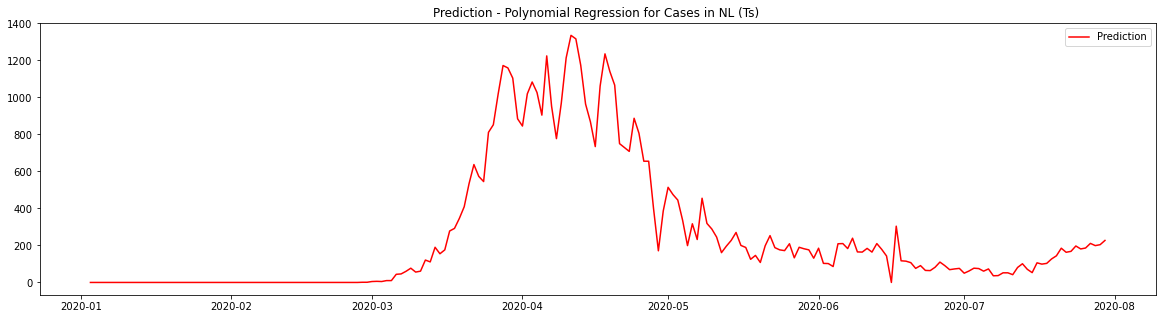

In [303]:
NumberofDaystoPredict = 7

data=agg.copy()
data = data[::-1]
source= pd.DataFrame()
source['date'] = data.iloc[0:3,5]
source['output'] = data.iloc[0:3,3]
source = source[::-1].reset_index(drop=True) 
past3days = np.array([source['output'].values[-1],source['output'].values[-2],source['output'].values[-3]]).reshape(1,-1)
predicttomorrow = int(float(str(np.round(lin.predict(poly.fit_transform(past3days)))).lstrip('[').rstrip(']')))
date = pd.to_datetime(agg['date'].values[-1]+np.timedelta64(1,'D'))
source=source.append({'output': predicttomorrow, 'date':date}, ignore_index=True)

for x in range(1,NumberofDaystoPredict):
    past3days = np.array([source['output'].values[-1],source['output'].values[-2],source['output'].values[-3]]).reshape(1,-1)
    predicttomorrow = int(float(str(np.round(lin.predict(poly.fit_transform(past3days)))).lstrip('[').rstrip(']')))
    date = pd.to_datetime(agg['date'].values[-1]+np.timedelta64(1+x,'D'))
    source=source.append({'output': predicttomorrow, 'date':date}, ignore_index=True)

newtable = agg.append(source).reset_index(drop=True)
newtable = newtable[['date','output']]
newtable = newtable.drop_duplicates('date')

plt.figure(figsize=(20,5))
plt.plot(newtable['date'],newtable['output'], linestyle='-', color='red')#, marker='o',)
plt.title('Prediction - Polynomial Regression for Cases in NL (Ts) ')
plt.legend(['Prediction'])

newtable.tail(NumberofDaystoPredict+7)